<a href="https://colab.research.google.com/github/dayeong9/dayeong9/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 불러오기
train_data = pd.read_csv('train.csv')
train_data.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt

plt.rc('font',family='NanumBarunGothic')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [6]:
train_data.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,23008.000000,23008.000000,23007.000000,9150.000000,23011.000000,23007.000000,22893.000000,18149.000000,22645.000000,23011.000000
mean,17.071714,8.451960,8.619277,9.593683,65.202851,2.380993,5.858826,11.933170,48.653526,12.415419
std,10.714471,10.578285,2.907096,21.966135,14.549077,0.947595,3.816941,6.419122,31.662321,10.489515
min,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,7.800000,-0.300000,6.600000,0.100000,54.900000,1.700000,2.200000,7.000000,17.800000,3.400000
50%,18.900000,9.200000,8.600000,1.400000,65.500000,2.200000,6.600000,11.220000,55.700000,13.800000
75%,26.400000,17.900000,10.600000,8.500000,75.800000,2.900000,9.000000,16.620000,78.000000,21.800000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000


In [7]:
#결측치 확인
pd.isna(train_data).sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [8]:
train_data[train_data['최저기온'].isnull() | train_data['최고기온'].isnull()| train_data['일교차'].isnull()| train_data['평균풍속'].isnull()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
2606,1967-02-19,NaN,NaN,NaN,NaN,62.0,1.8,9.5,NaN,93.1,-1.7
5037,1973-10-16,NaN,NaN,NaN,0.4,74.0,1.8,3.5,9.24,29.7,12.3
8597,1983-07-16,26.5,21.3,5.2,3.9,79.5,NaN,2.2,8.02,15.2,24.2
21104,2017-10-12,NaN,8.8,NaN,NaN,71.0,2.0,NaN,2.23,0.0,11.4
21106,2017-10-14,20.5,9.0,11.5,NaN,42.8,NaN,10.6,10.58,93.8,14.4
21158,2017-12-05,-0.4,-8.2,7.8,0.1,40.1,NaN,2.1,0.86,21.6,-4.2
21159,2017-12-06,6.0,-4.5,10.5,1.2,72.6,NaN,7.7,6.14,79.4,0.2
22865,2022-08-08,28.4,NaN,NaN,129.6,91.6,3.3,NaN,NaN,0.0,26.8


In [9]:
train_data[train_data['강수량'].isnull() & train_data['일조합'].isnull()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
2250,1966-02-28,10.3,1.0,9.3,NaN,80.3,2.7,NaN,NaN,0.0,5.9
2555,1966-12-30,-1.6,-7.8,6.2,NaN,51.5,1.2,NaN,NaN,0.0,-4.4
3654,1970-01-02,2.6,-2.4,5.0,NaN,81.0,0.7,NaN,NaN,0.0,-0.3
16782,2005-12-12,-5.5,-10.1,4.6,NaN,43.0,3.6,NaN,NaN,0.0,-8.0
18912,2011-10-12,18.7,10.7,8.0,NaN,52.5,1.2,NaN,NaN,0.0,14.7
21090,2017-09-28,25.3,14.2,11.1,NaN,49.1,2.8,NaN,11.81,0.0,19.2
21104,2017-10-12,NaN,8.8,NaN,NaN,71.0,2.0,NaN,2.23,0.0,11.4
21150,2017-11-27,9.5,-2.9,12.4,NaN,53.0,1.3,NaN,NaN,0.0,2.5
21153,2017-11-30,2.7,-5.2,7.9,NaN,26.8,3.3,NaN,NaN,0.0,-2.4
21210,2018-01-26,-10.7,-17.8,7.1,NaN,34.9,2.6,NaN,NaN,0.0,-14.8


In [10]:
## 결측치 처리
# 최저기온,최고기온,일교차, 평균풍속 없는 데이터 drop
train_data.dropna(subset=['최저기온', '최고기온', '일교차', '평균풍속'])

# 일조합,일사합,일조율은 뒤의 데이터로 채움
train_data['일조합'].fillna(method='bfill', inplace=True)
train_data['일사합'].fillna(method='bfill', inplace=True)
train_data['일조율'].fillna(method='bfill', inplace=True)

# 강수량 없는 건 0으로 채움
train_data['강수량'] = train_data['강수량'].fillna(0)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     23011 non-null  float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     23011 non-null  float64
 8   일사합     23011 non-null  float64
 9   일조율     23011 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [12]:
##파생변수 생성
# 비오는 날 여부
train_data['강수여부'] = train_data['강수량'].apply(lambda x: 'y' if pd.notna(x) and x != 0 else 'n')
# 계절
train_data['일시'] = pd.to_datetime(train_data['일시'])
train_data['계절'] = train_data['일시'].dt.month.map({12: '겨울', 1: '겨울', 2: '겨울', 3: '봄', 4: '봄', 5: '봄', 6: '여름', 7: '여름', 8: '여름', 9: '가을', 10: '가을', 11: '가을'})

# '년도' 컬럼 추가
train_data['년도'] = train_data['일시'].dt.year

# '전년대비평균기온' 컬럼 추가
train_data['전년대비평기'] = train_data['평균기온']-train_data['일시'].apply(lambda x: train_data[train_data['일시'] == x - pd.DateOffset(years=1)]['평균기온'].iloc[0] if x - pd.DateOffset(years=1) in train_data['일시'].values else None)

# '전일대비 평균기온' 컬럼 추가
train_data['전일대비평기'] = train_data['평균기온']-train_data['일시'].apply(lambda x: train_data[train_data['일시'] == x - pd.DateOffset(days=1)]['평균기온'].iloc[0] if x - pd.DateOffset(days=1) in train_data['일시'].values else None)


train_data.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,강수여부,계절,년도,전년대비평기,전일대비평기
0,1960-01-01,2.2,-5.2,7.4,0.0,68.3,1.7,6.7,4.81,28.1,-1.6,n,겨울,1960,NaN,NaN
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,4.81,28.1,-1.9,y,겨울,1960,NaN,-0.3
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,4.81,28.1,4.0,n,겨울,1960,NaN,5.9
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,4.81,28.1,7.5,n,겨울,1960,NaN,3.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,4.81,28.1,-4.6,n,겨울,1960,NaN,-12.1


Text(0.5, 1.0, '계절별 평균기온 Boxplot')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


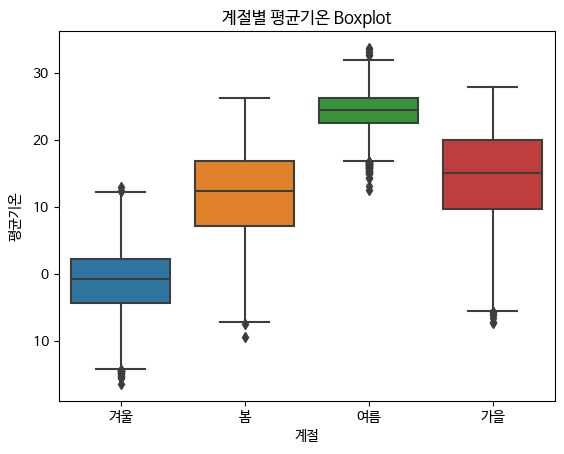

In [13]:
##이상치 파악

sns.boxplot(data=train_data, x='계절',y='평균기온').set_title('계절별 평균기온 Boxplot')

Text(0.5, 1.0, '강수여부별 평균기온 Boxplot')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


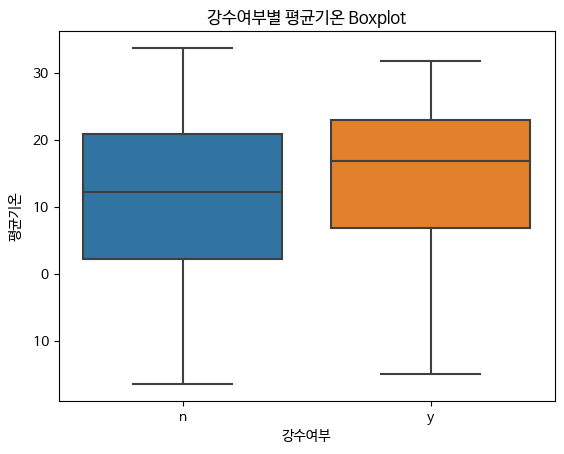

In [14]:
sns.boxplot(data=train_data, x='강수여부',y='평균기온').set_title('강수여부별 평균기온 Boxplot')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


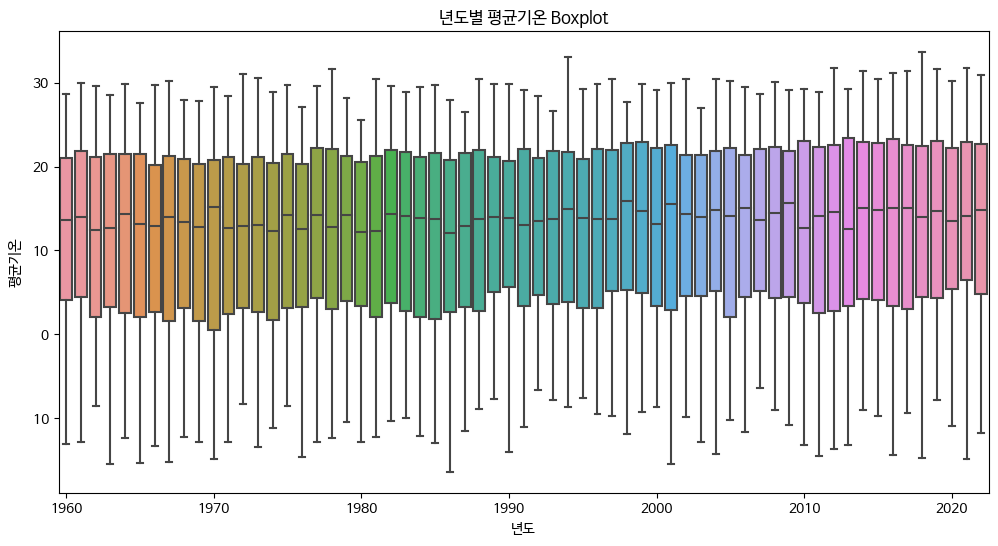

In [15]:
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='년도',y='평균기온').set_title('년도별 평균기온 Boxplot')
plt.gca().xaxis.set_major_locator(MultipleLocator(10))  # 10년 단위로 틱 설정


Text(0, 0.5, '평균기온')

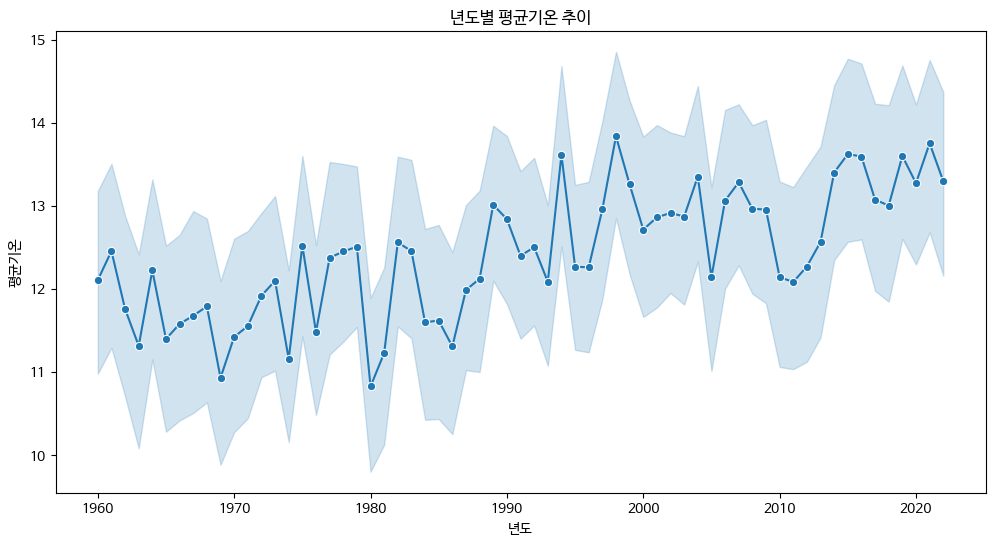

In [16]:
#년도별 평균기온
plt.figure(figsize=(12, 6))
sns.lineplot(x='년도', y='평균기온', data=train_data, marker='o')
plt.title('년도별 평균기온 추이')
plt.xlabel('년도')
plt.ylabel('평균기온')


Text(0, 0.5, '평균기온(전년대비)')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


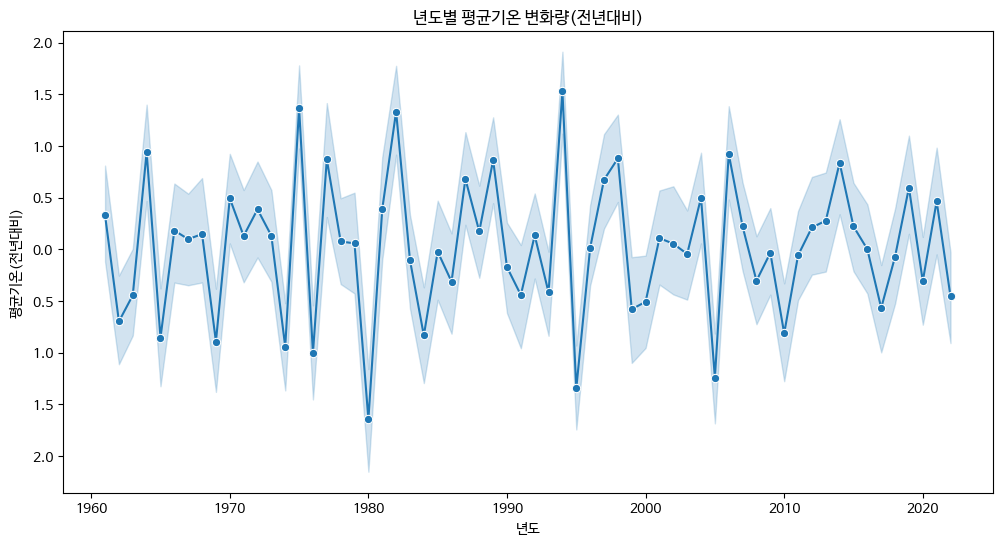

In [17]:
#년도별 평균기온
plt.figure(figsize=(12, 6))
sns.lineplot(x='년도', y='전년대비평기', data=train_data, marker='o')
plt.title('년도별 평균기온 변화량(전년대비)')
plt.xlabel('년도')
plt.ylabel('평균기온(전년대비)')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, '평균기온에 영향을 미치는 변수별 산점도')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


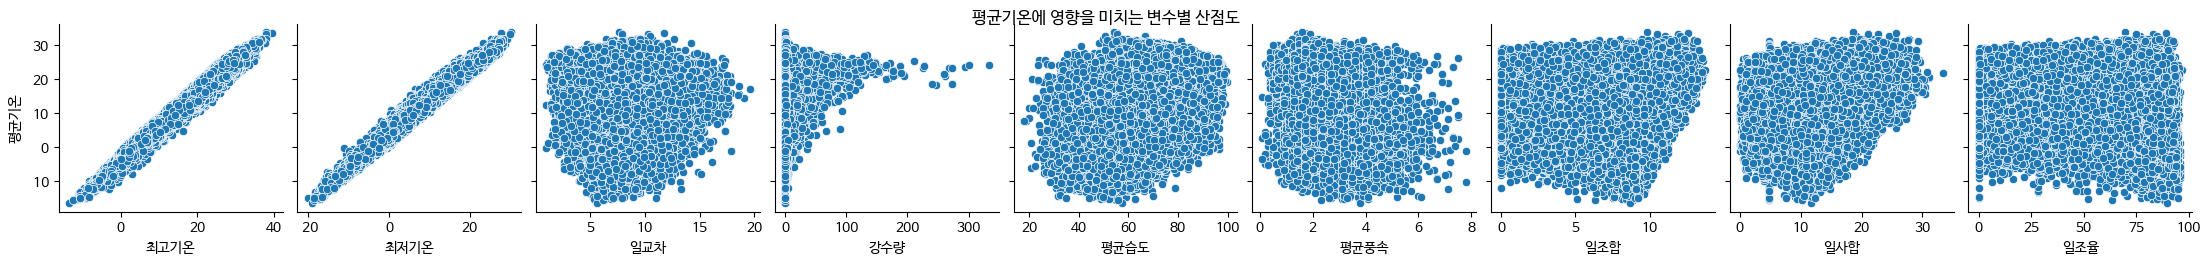

In [18]:
sns.pairplot(train_data, x_vars=['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율'], y_vars=['평균기온'])
plt.suptitle('평균기온에 영향을 미치는 변수별 산점도', y=1.02)

Text(0.5, 1.02, '강수량과 일조/일사 관련 지표')

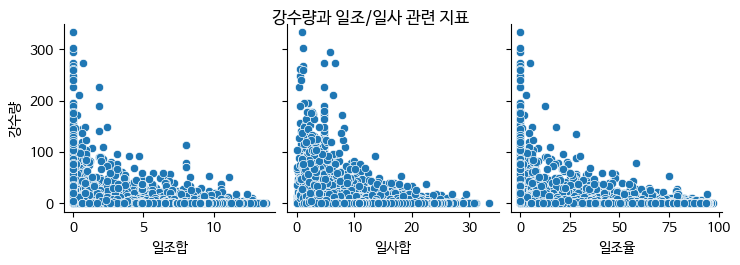

In [19]:
#강수량과 일조합, 일사합 관계

sns.pairplot(train_data, x_vars=['일조합', '일사합', '일조율'], y_vars=['강수량'])
plt.suptitle('강수량과 일조/일사 관련 지표', y=1.02)


<ipython-input-20-bacbb8f38790>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=train_data.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, '변수 간 상관 관계 히트맵')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


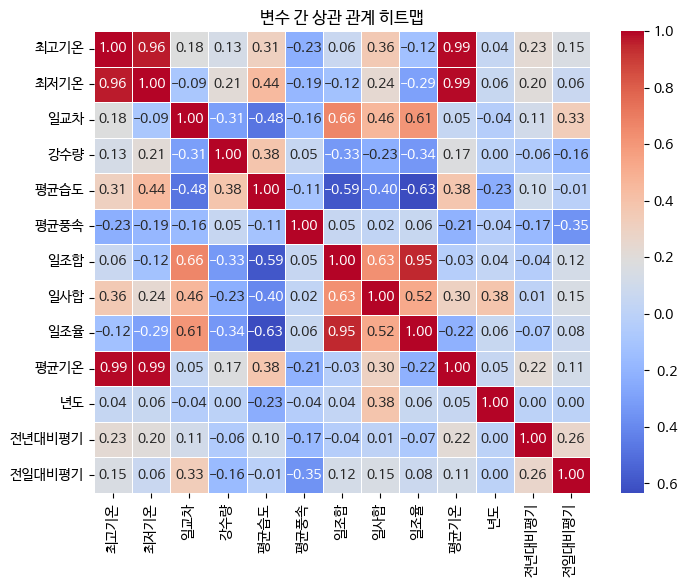

In [20]:
#전체 변수간 상관관계 heatmap

correlation_matrix=train_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('변수 간 상관 관계 히트맵')

# 평균기온과 강한 상관관계 : 평균습도(+), 일사합(+)/ 약한 상관관계 : 일조율(-), 평균풍속(-), 강수량(+)
# 강수량과 강한 상관관계 : 일교차(-), 평균습도(+), 일조합(-), 일조율(-)/ 약한 상관관계 : 최고기온(+), 최저기온(+), 일사합(-), 평균기온(+)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      23011 non-null  datetime64[ns]
 1   최고기온    23008 non-null  float64       
 2   최저기온    23008 non-null  float64       
 3   일교차     23007 non-null  float64       
 4   강수량     23011 non-null  float64       
 5   평균습도    23011 non-null  float64       
 6   평균풍속    23007 non-null  float64       
 7   일조합     23011 non-null  float64       
 8   일사합     23011 non-null  float64       
 9   일조율     23011 non-null  float64       
 10  평균기온    23011 non-null  float64       
 11  강수여부    23011 non-null  object        
 12  계절      23011 non-null  object        
 13  년도      23011 non-null  int64         
 14  전년대비평기  22645 non-null  float64       
 15  전일대비평기  23010 non-null  float64       
dtypes: datetime64[ns](1), float64(12), int64(1), object(2)
memory usage: 2.8+ MB


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


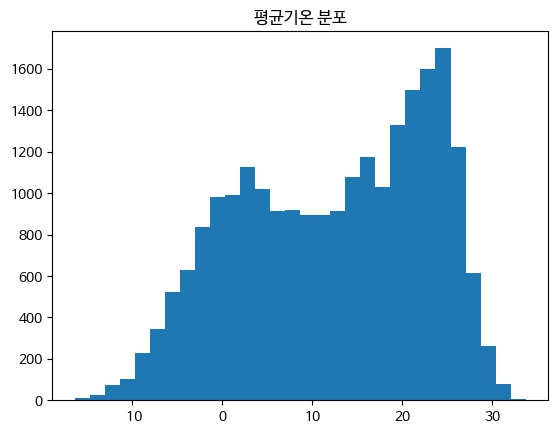

In [22]:
# '평균기온'의 분포 시각화
plt.hist(train_data['평균기온'].dropna(), bins=30)
plt.title('평균기온 분포')
plt.show()


In [23]:
## 모델링 1) 시계열 특성 고려하여 arima 모델 사용

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [24]:
result = adfuller(train_data['평균기온'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -16.619186130069973
p-value: 1.704000078081839e-29
Critical Values: {'1%': -3.4306348073488953, '5%': -2.861665875733115, '10%': -2.5668370000577982}


In [25]:
result = adfuller(train_data['강수량'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# 평균기온 , 강수량 모두 p값 작아서 정상 시계열 데이터라고 볼 수 없음

ADF Statistic: -18.82038106379208
p-value: 2.0222036320733916e-30
Critical Values: {'1%': -3.430634621406358, '5%': -2.861665793556404, '10%': -2.566836956316797}


In [62]:
## XG Boost 모델 사용

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [63]:
# '일시' 컬럼을 datetime 형식으로 변환
train_data['일시'] = pd.to_datetime(train_data['일시'])

In [64]:
# 데이터 전처리
t_data = train_data[['일시', '평균기온', '평균습도', '일사합', '일조율', '평균풍속', '강수량']].copy()
t_data.set_index('일시', inplace=True)

In [65]:
# 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(t_data)


In [66]:
# 시계열 데이터를 학습 데이터로 변환
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back), :])
        Y.append(dataset[i + look_back, 0])  # 평균기온을 예측값으로 설정
    return np.array(X), np.array(Y)

look_back = 5  # 시점 수
X, Y = create_dataset(scaled_data, look_back)

In [67]:
# 데이터를 학습(train)과 검증(test) 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)


In [68]:
# XGBoost 모델 생성
model = XGBRegressor(objective ='reg:squarederror')
model.fit(X_train.reshape(-1, look_back * t_data.shape[1]), y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

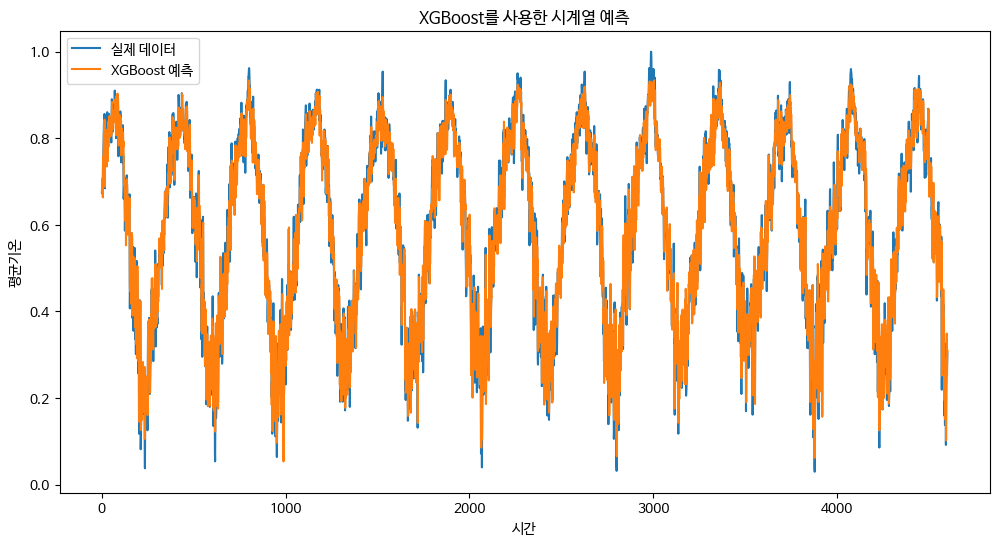

Mean Squared Error (MSE): 0.001831998810822156


In [77]:
# 검증 데이터에 대한 예측
predictions = model.predict(X_test.reshape(-1, look_back * t_data.shape[1]))

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='실제 데이터')
plt.plot(predictions, label='XGBoost 예측')
plt.title('XGBoost를 사용한 시계열 예측')
plt.xlabel('시간')
plt.ylabel('평균기온')
plt.legend()
plt.show()

# 평가 지표 출력 (평균제곱오차)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

In [70]:
## 최종예측
fin_pred=pd.read_csv('sample_submission.csv')
fin_pred.head()

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0


In [71]:
fin_pred['일시'] = pd.to_datetime(fin_pred['일시'])


In [80]:

# 필요한 컬럼 선택 ('평균기온'만 선택)
new_data_selected = fin_pred[['일시', '평균기온']].copy()
new_data_selected.set_index('일시', inplace=True)

print(new_data_selected)

            평균기온
일시              
2023-01-01     0
2023-01-02     0
2023-01-03     0
2023-01-04     0
2023-01-05     0
...          ...
2023-12-20     0
2023-12-21     0
2023-12-22     0
2023-12-23     0
2023-12-24     0

[358 rows x 1 columns]


In [84]:
scaler = MinMaxScaler()
scaled_new_data = scaler.fit_transform(new_data_selected)

print(scaled_new_data.shape)

(358, 1)


In [86]:
# 여러 개의 트리를 시각화
for tree_index in range(n_trees):  # n_trees는 트리의 총 개수
    plot_tree(xgb_reg, num_trees=tree_index, rankdir='LR')
    plt.show()

NameError: ignored

In [85]:
predictions_new_data = model.predict(new_data_selected)

ValueError: ignored

In [73]:
# 기존 데이터 전처리와 동일한 스케일링 적용
scaler = MinMaxScaler()
scaled_new_data = scaler.fit_transform(new_data_selected)

# 시계열 데이터로 변환
look_back = 5  # 시점 수 (기존에 사용한 것과 동일하게 설정)
X_new = []

for i in range(len(scaled_new_data) - look_back + 1):
    X_new.append(scaled_new_data[i:i+look_back, 0])  # '평균기온'만 선택하여 추가

X_new = np.array(X_new)

In [75]:

# (기존에 학습한 XGBoost 모델의 특성 개수를 30으로 가정하고 있음)
X_new_padded = np.pad(X_new, ((0, 0), (0, 30 - X_new.shape[1])))

# 예측
predictions_new_data = model.predict(X_new_padded)

# 예측 결과를 '평균기온' 컬럼에 채우기
new_data_selected['평균기온'] = np.nan
new_data_selected['평균기온'].iloc[look_back-1:] = predictions_new_data

# 예측 결과를 파일로 저장
new_data_selected.to_csv('predicted_results.csv')

In [26]:
## 모델링 2) LSTM 모델 사용
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split


In [27]:
#범주형 변수 원핫인코딩

# train_data에서 필요한 부분을 추출
categorical_data = train_data[['강수여부', '계절']]

# 원핫인코딩 적용
categorical_data_encoded = pd.get_dummies(categorical_data, columns=['강수여부', '계절'])

# '강수여부'와 '계절' 컬럼 삭제
train_data = train_data.drop(['강수여부', '계절'], axis=1)

# 인코딩된 결과를 train_data에 합치기
train_data = pd.concat([train_data, categorical_data_encoded], axis=1)

In [28]:
t_data = train_data[['일시', '평균기온','평균습도','일사합','일조율','평균풍속','강수량']].copy()

# 데이터 전처리
t_data.set_index('일시', inplace=True)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(t_data)

In [29]:
# 시계열 데이터를 학습 데이터로 변환
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5  # 시점 수
X, Y = create_dataset(scaled_data, look_back)

In [30]:
# 데이터를 학습(train)과 검증(test) 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (18404, 5)
X_test shape: (4602, 5)
y_train shape: (18404,)
y_test shape: (4602,)


In [31]:
# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# 모델 학습
model.fit(X_train.reshape(-1, look_back, 1), y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
576/576 [==============================] - 6s 7ms/step - loss: 0.0123
Epoch 2/50
576/576 [==============================] - 4s 7ms/step - loss: 0.0030
Epoch 3/50
576/576 [==============================] - 3s 5ms/step - loss: 0.0023
Epoch 4/50
576/576 [==============================] - 3s 5ms/step - loss: 0.0021
Epoch 5/50
576/576 [==============================] - 3s 5ms/step - loss: 0.0021
Epoch 6/50
576/576 [==============================] - 4s 7ms/step - loss: 0.0021
Epoch 7/50
576/576 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 8/50
576/576 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 9/50
576/576 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 10/50
576/576 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 11/50
576/576 [==============================] - 4s 6ms/step - loss: 0.0020
Epoch 12/50
576/576 [==============================] - 3s 6ms/step - loss: 0.0020
Epoch 13/50
576/576 [====

In [33]:
# 검증 데이터에 대한 예측
predictions = model.predict(X_test.reshape(-1, look_back, 1))
predictions = scaler.inverse_transform(predictions.reshape(-1, len(t_data.columns)))

# y_test의 shape을 조정
y_test = scaler.inverse_transform(y_test.reshape(-1, len(t_data.columns)))

144/144 [==============================] - 1s 3ms/step


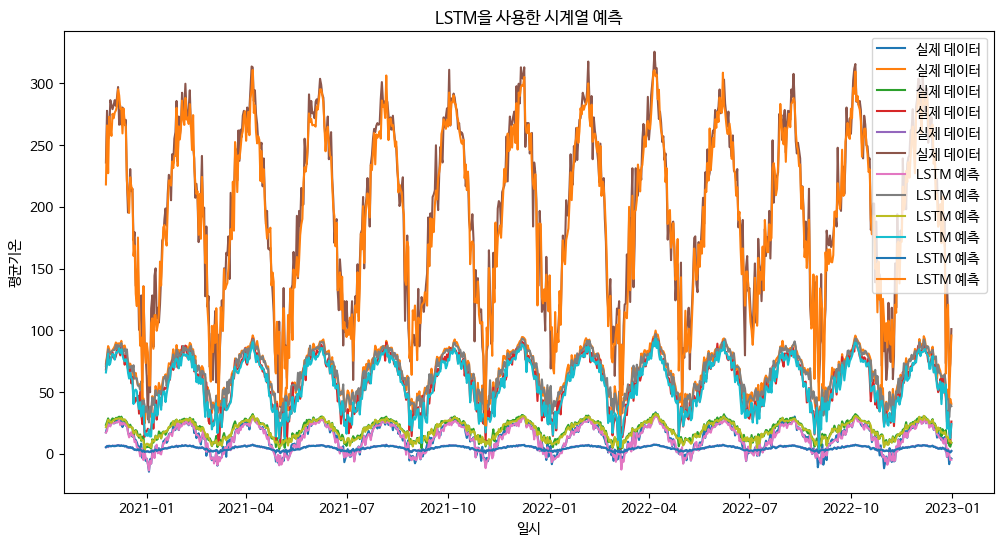

In [35]:
# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(t_data.index[-len(predictions):], y_test, label='실제 데이터')
plt.plot(t_data.index[-len(predictions):], predictions, label='LSTM 예측')
plt.title('LSTM을 사용한 시계열 예측')
plt.xlabel('일시')
plt.ylabel('평균기온')
plt.legend()
plt.show()

In [36]:
## 최종예측
fin_pred=pd.read_csv('sample_submission.csv')
fin_pred.head()

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0


In [61]:
# '일시' 컬럼만 있는 데이터 가져오기
input_data = fin_pred[['일시']]

# 데이터 전처리
scaler = MinMaxScaler()
scaled_input_data = scaler.fit_transform(input_data)

# 시퀀스 데이터로 변환 (샘플링하려는 시점 수에 따라 look_back 조절)
def create_sequence_data(data, look_back=1):
    X = []
    for i in range(len(data) - look_back + 1):
        X.append(data[i:(i + look_back), :])
    return np.array(X)

look_back = 5  # 시퀀스 길이 설정
X_new = create_sequence_data(scaled_input_data, look_back)

# 예측
predictions = model.predict(X_new)

# 예측값 역변환
new_predictions_inverse = scaler.inverse_transform(predictions.reshape(-1, 1))

# 예측값을 DataFrame으로 변환
predicted_df = pd.DataFrame(new_predictions_inverse, columns=['평균기온'])

# '일시' 컬럼 추가
predicted_df['일시'] = fin_pred['일시'].values[look_back - 1:]

ValueError: ignored